In [ ]:
!mkdir data

**Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import tree, metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

**Loding the dataset**

In [3]:
bank_data = pd.read_csv('data/loan_data.csv')
bank_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Reading the Data

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
bank_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
bank_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
bank_data.shape

(9578, 14)

Checking the null values in the dataset

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


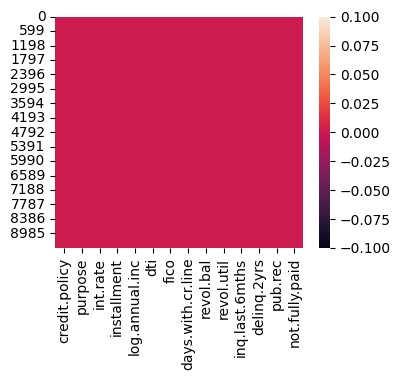

In [8]:
print(bank_data.isnull().sum())

plt.figure(figsize=(4, 3))
sns.heatmap(bank_data.isnull())
plt.show()

Checking for multi valued categorical data

In [9]:
bank_data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

# **`Data Visualisation`**

<Axes: xlabel='not.fully.paid'>

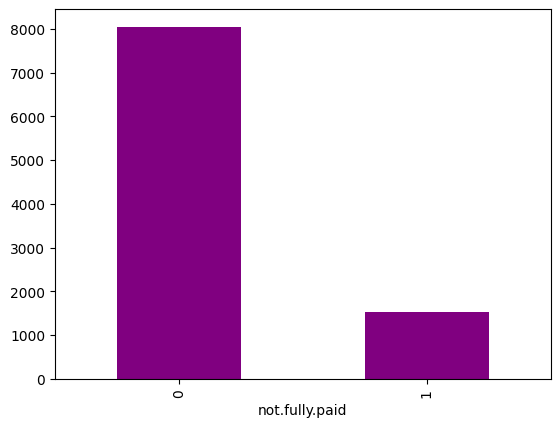

In [10]:
bank_data['not.fully.paid'].value_counts().plot(kind='bar', color='purple')

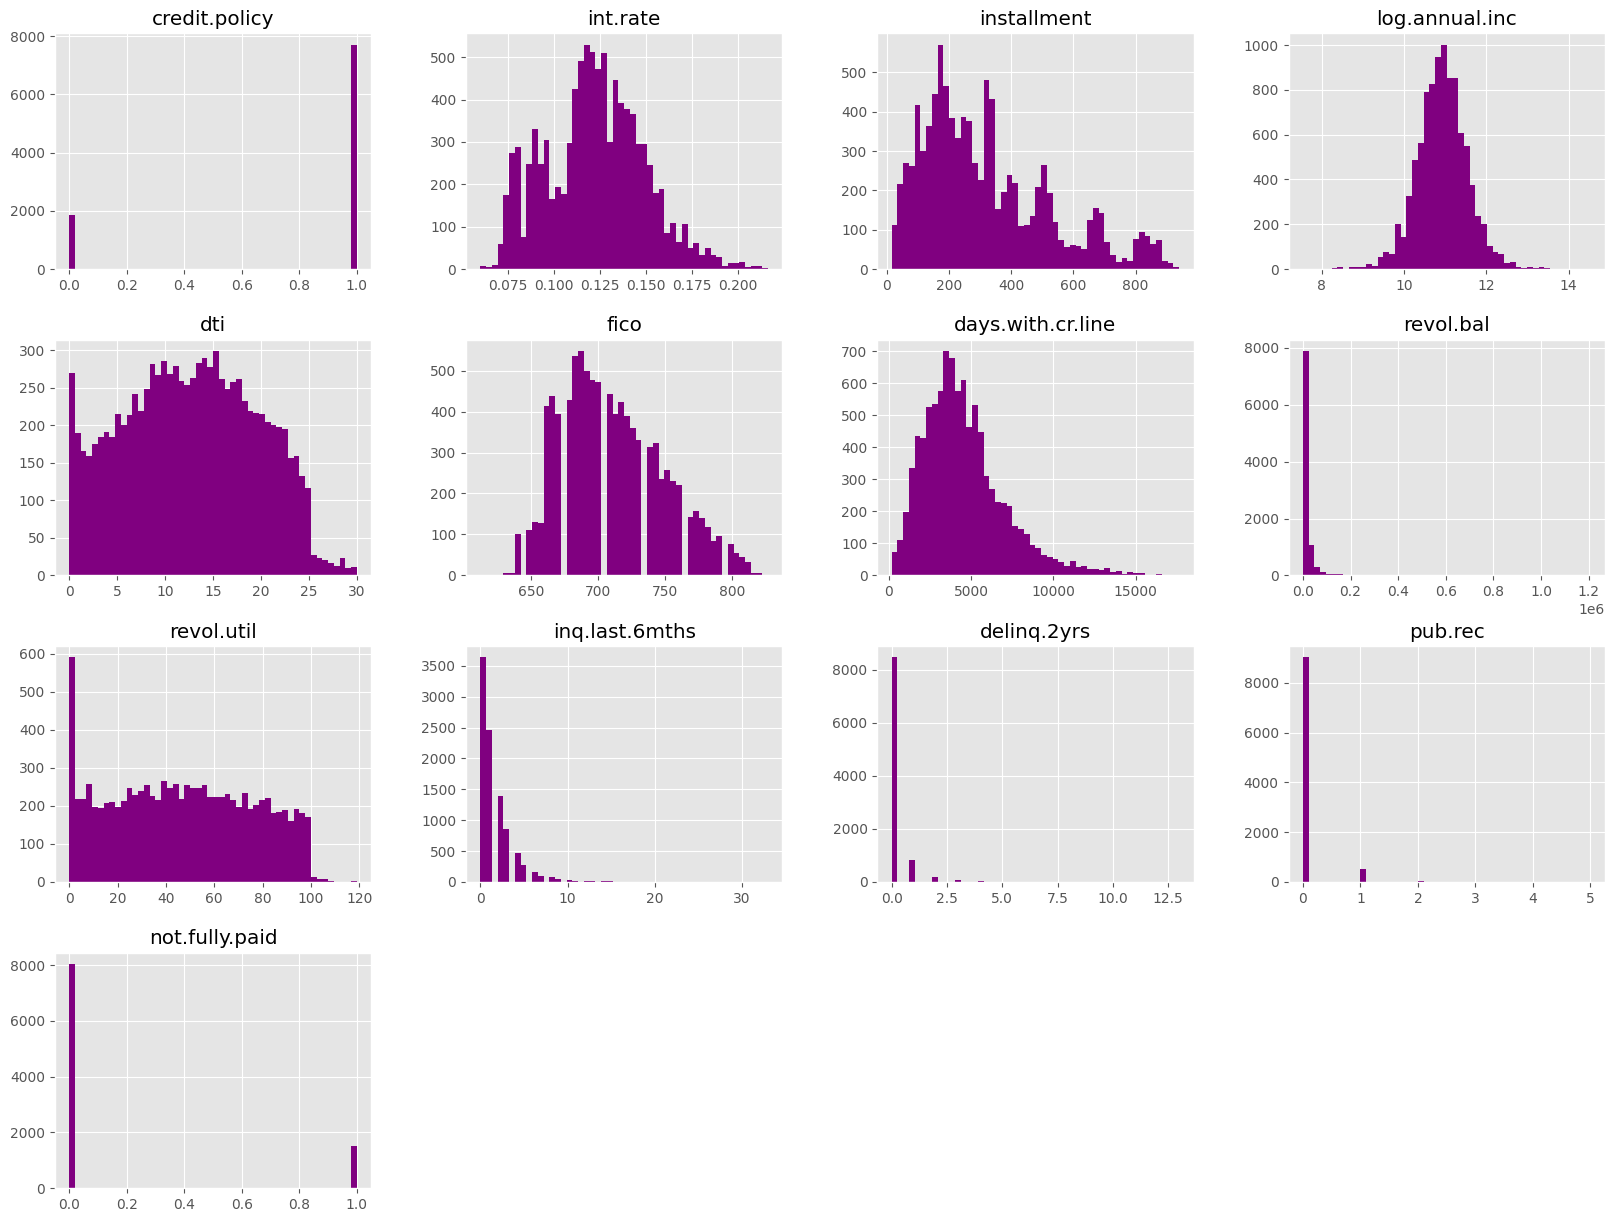

In [11]:
plt.style.use('ggplot')

bank_data.hist(bins=50,figsize=(20,15), color='purple')
plt.show()

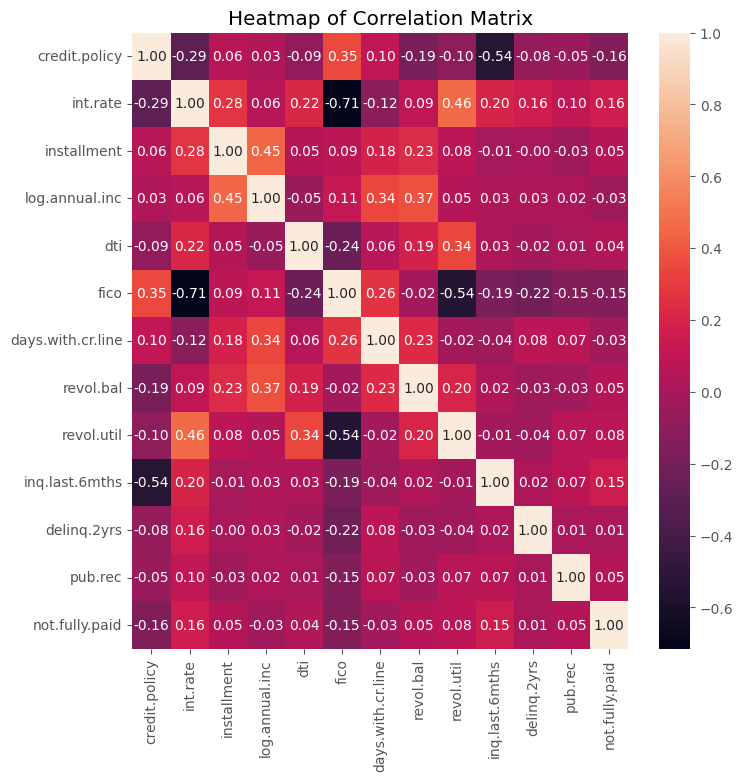

In [12]:
numerical_features = bank_data.select_dtypes(include=np.number).columns
corr_matrix = bank_data[numerical_features].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [13]:
cat_columns = bank_data.drop('not.fully.paid', axis=1).select_dtypes(exclude='number').columns.tolist()
num_columns = bank_data.select_dtypes(include='number').columns.tolist()

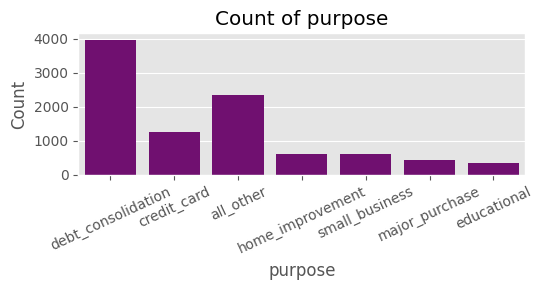

In [14]:
n_cols = 3
n_rows = (len(cat_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(data=bank_data, x=col, ax=axes[i], color='purple')
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=25)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

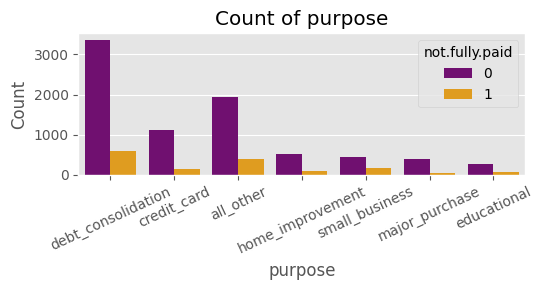

In [15]:
n_cols = 3
n_rows = (len(cat_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
custom_palette = {0: 'purple', 1: 'orange'}
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(data=bank_data, x=col, ax=axes[i], hue='not.fully.paid', palette=custom_palette)
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=25)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Data preparation**

Encoding categorical data

In [16]:
categorical_columns = ['purpose']
df = pd.get_dummies(bank_data,columns=categorical_columns)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [17]:
dummy_cols = [col for col in df.columns if col.startswith('purpose_')]

for col in dummy_cols:
    df[col] = df[col].astype(int)

df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


Checking the data after encoding

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

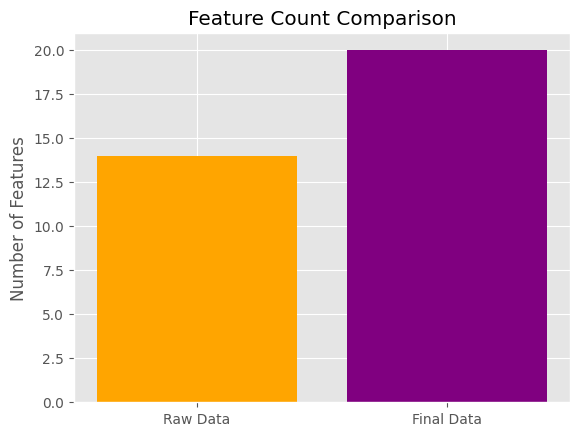

In [19]:
raw_feature_count = bank_data.shape[1]
final_feature_count = df.shape[1]

plt.bar(["Raw Data", "Final Data"], [raw_feature_count, final_feature_count], color=["orange", "purple"])
plt.title("Feature Count Comparison")
plt.ylabel("Number of Features")
plt.show()

Separating target (Y) and variables (X) from dataset

In [20]:
target = df['not.fully.paid']
variables = df.drop(columns=['not.fully.paid'])

Perfoming Train Test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size = 0.20, random_state = 175)
original_data = {'X_train': X_train, 'y_train':y_train, 'X_test': X_test, 'y_test':y_test}

Checking for imbalanced dataset and applying SMOTE

In [22]:
print('Original class distribution: \n')
print(target.value_counts())

imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train)
X_train_scaled_imputed = pd.DataFrame(X_train_scaled_imputed, columns=X_train.columns)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_imputed, y_train)

print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

not.fully.paid
0    6424
1    6424
Name: count, dtype: int64


Plotting before and after balancing the data

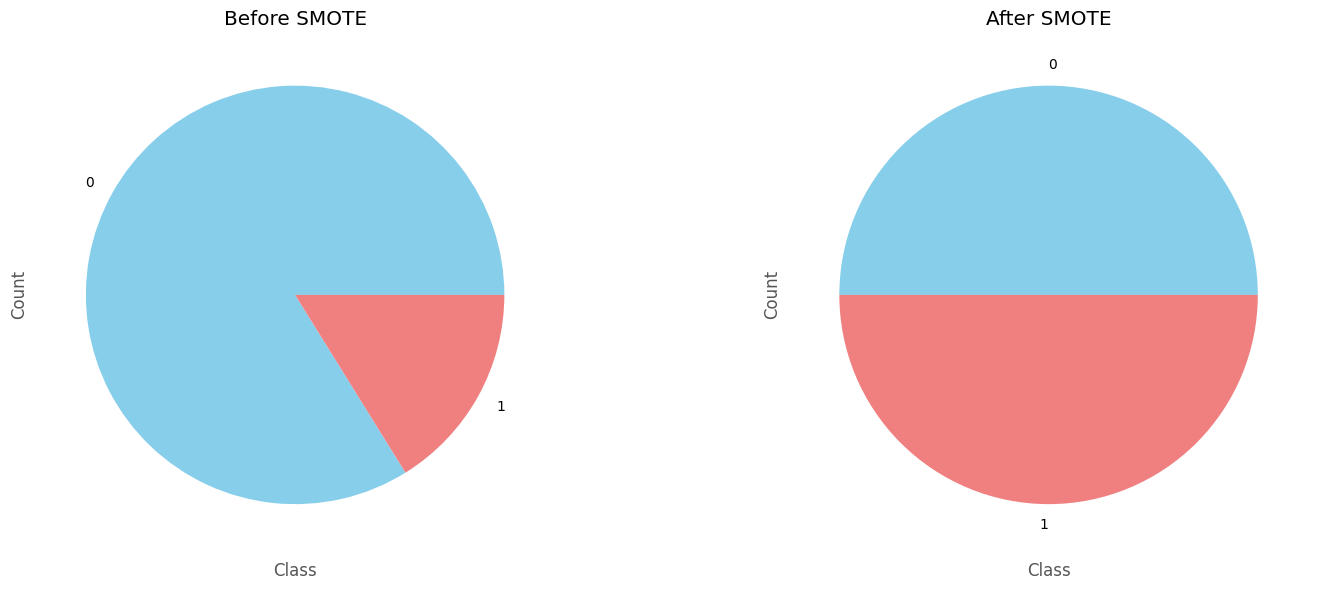

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

y_train.value_counts().plot(kind='pie', title='Before SMOTE', ax=axes[0], colors=['skyblue', 'lightcoral'])
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

y_train_resampled.value_counts().plot(kind='pie', title='After SMOTE', ax=axes[1], colors=['skyblue', 'lightcoral'])
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Normalising the data

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = variables.columns)
X_train_scaled.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.620745,1.470070,0.110142,-0.149979,-0.071137,-0.825940,-0.677069,-0.118884,1.156585,0.051097,-0.332639,-0.287001,-0.612996,-0.391797,-0.874253,-0.227508,-0.284312,-0.218759,3.582262
1,0.620745,-0.544627,0.844013,1.917750,-1.456384,1.474033,0.569285,-0.434651,0.588311,-0.800001,-0.332639,-0.287001,-0.612996,-0.391797,-0.874253,-0.227508,-0.284312,-0.218759,3.582262
2,0.620745,-0.293785,-1.370543,-0.133556,0.607786,-0.538444,-0.897152,-0.451954,0.548496,-0.800001,-0.332639,-0.287001,1.868288,-0.391797,-0.874253,-0.227508,-0.284312,-0.218759,-0.332315
3,0.620745,-0.417215,2.339938,-0.251966,0.251580,1.186536,0.359503,-0.023603,-0.598911,0.051097,-0.332639,-0.287001,-0.612996,-0.391797,1.308682,-0.227508,-0.284312,-0.218759,-0.332315
4,0.620745,-1.468361,-1.142841,0.705463,1.548536,0.324046,1.581159,-0.113711,0.660703,-0.800001,-0.332639,-0.287001,-0.612996,-0.391797,1.308682,-0.227508,-0.284312,-0.218759,-0.332315


In [26]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = variables.columns)
X_test_scaled.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.620745,0.590133,0.027096,-0.323880,1.461768,-0.682192,-0.899208,-0.125738,0.899595,-0.800001,-0.332639,-0.287001,-0.612996,-0.391797,1.308682,-0.227508,-0.284312,-0.218759,-0.332315
1,-1.875057,2.154908,1.792445,0.283062,1.390222,-1.400934,-0.862565,-0.056165,1.004563,-0.374452,-0.332639,-0.287001,-0.612996,-0.391797,1.308682,-0.227508,-0.284312,-0.218759,-0.332315
2,0.620745,-1.293170,0.138473,0.666534,-1.960249,1.186536,1.408414,-0.388252,-1.554480,-0.800001,1.640616,-0.287001,1.868288,-0.391797,-0.874253,-0.227508,-0.284312,-0.218759,-0.332315
3,0.620745,-0.317675,-0.625728,0.066763,0.288114,0.467795,0.322482,-0.241296,1.627131,-0.800001,-0.332639,-0.287001,1.868288,-0.391797,-0.874253,-0.227508,-0.284312,-0.218759,-0.332315
4,0.620745,0.084468,-0.611238,-0.399071,-0.141161,-0.394695,-0.442606,-0.385873,-0.309344,-0.800001,-0.332639,-0.287001,-0.612996,-0.391797,1.308682,-0.227508,-0.284312,-0.218759,-0.332315


Checking the data after normalization

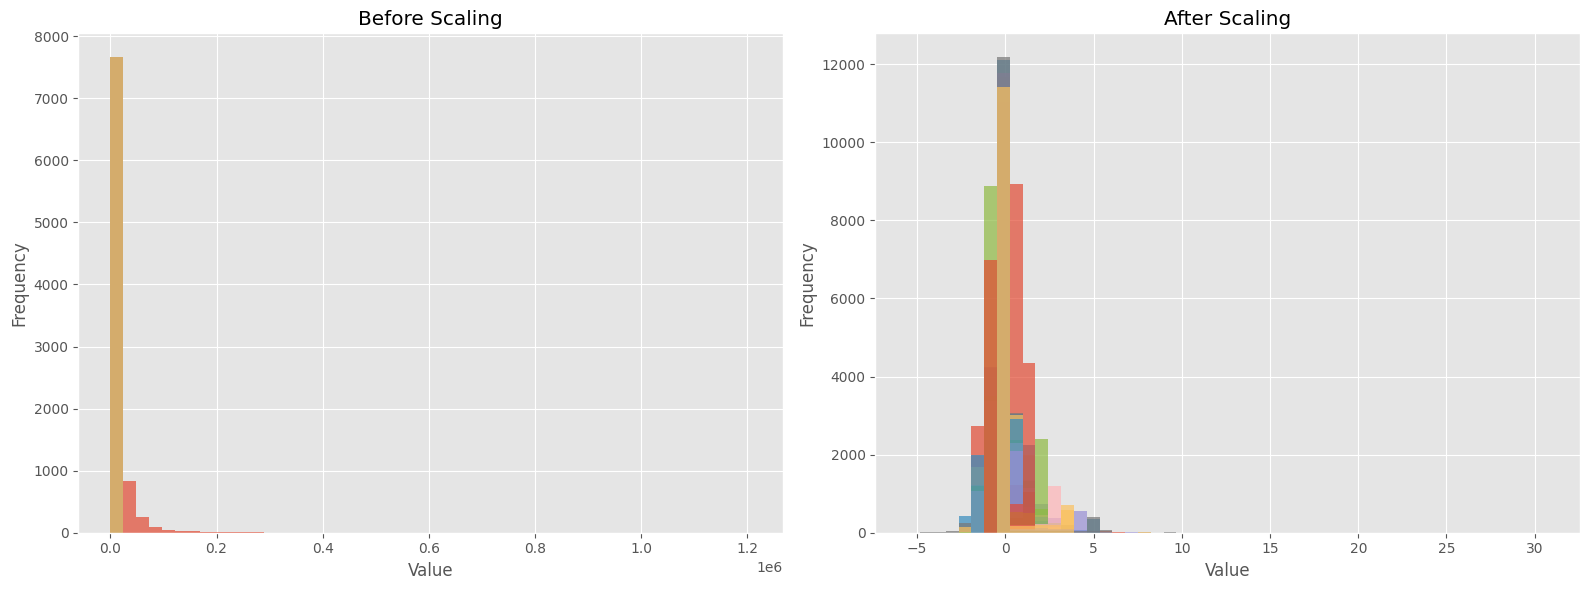

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
X_train.plot(kind='hist', bins=50, title='Before Scaling', ax=axes[0], alpha=0.7, legend=False)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

X_train_scaled.plot(kind='hist', bins=50, title='After Scaling', ax=axes[1], alpha=0.7, legend=False)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [28]:
X_train_final = X_train_scaled
X_test_final = X_test_scaled
y_train_final = y_train_resampled
y_test_final = y_test

print(X_train_scaled.shape)
print(y_train_final.shape)

(12848, 19)
(12848,)


In [29]:
print(X_train.shape)
print(y_train.shape)

(7662, 19)
(7662,)


In [30]:
def predict_and_generate_report(model_name, model, X_train, y_train, X_test, y_test):
  y_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)

  print(f"Model: {model_name}")
  print('\n')
  print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Precision: {precision_score(y_test, y_pred)}")
  print(f"Recall: {recall_score(y_test, y_pred)}")
  print(f"F1 Score: {f1_score(y_test, y_pred)}")
  print('\n')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))
  print('\n')
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

# Application of Machine Learning Algortihms

Model: Naive Bayes Classifier


Train Accuracy: 0.6422011207970112
Test Accuracy: 0.5975991649269311
Precision: 0.21046228710462286
Recall: 0.5864406779661017
F1 Score: 0.3097582811101164


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      1621
           1       0.21      0.59      0.31       295

    accuracy                           0.60      1916
   macro avg       0.55      0.59      0.51      1916
weighted avg       0.78      0.60      0.65      1916





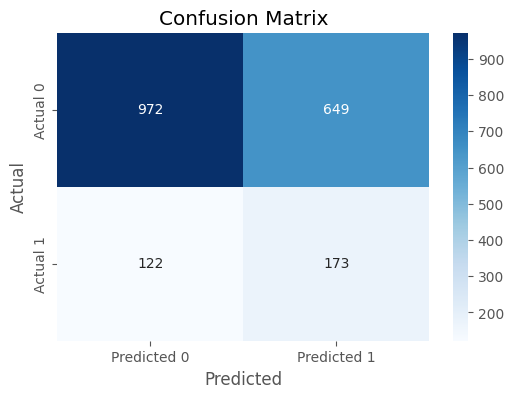

In [32]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_final, y_train_final)

predict_and_generate_report('Naive Bayes Classifier', nb_classifier, X_train_final, y_train_final, X_test_final, y_test_final)

Model: Logistic Regression Classifier


Train Accuracy: 0.636752801992528
Test Accuracy: 0.6393528183716075
Precision: 0.23315363881401618
Recall: 0.5864406779661017
F1 Score: 0.33365477338476374


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.65      0.75      1621
           1       0.23      0.59      0.33       295

    accuracy                           0.64      1916
   macro avg       0.56      0.62      0.54      1916
weighted avg       0.79      0.64      0.69      1916





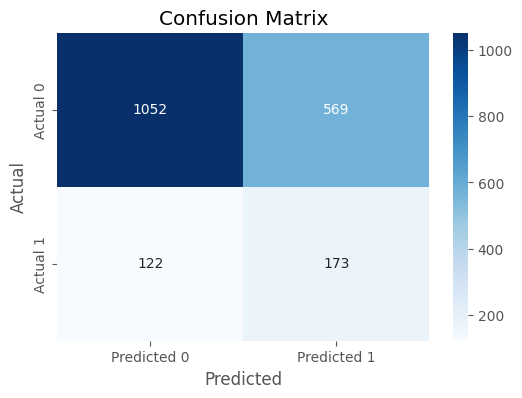

In [33]:
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_final, y_train_final)

predict_and_generate_report('Logistic Regression Classifier', lr_classifier, X_train_final, y_train_final, X_test_final, y_test_final)

In [36]:
neg = np.sum(y_train_final == 0)
pos = np.sum(y_train_final == 1)
scale_pos_weight = neg / pos

Model: XGBoost Classifier


Train Accuracy: 0.7738169364881694
Test Accuracy: 0.4932150313152401
Precision: 0.19494584837545126
Recall: 0.7322033898305085
F1 Score: 0.30791161796151106


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.45      0.60      1621
           1       0.19      0.73      0.31       295

    accuracy                           0.49      1916
   macro avg       0.55      0.59      0.45      1916
weighted avg       0.79      0.49      0.56      1916





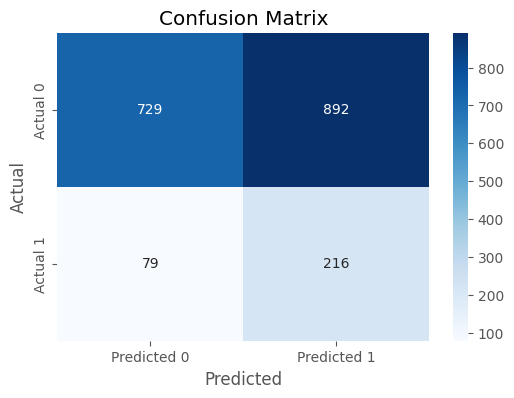

In [37]:
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight * 10,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='aucpr',
    random_state=42
)

xgb_model.fit(X_train_final, y_train_final)
predict_and_generate_report('XGBoost Classifier', xgb_model, X_train_final, y_train_final, X_test_final, y_test_final)

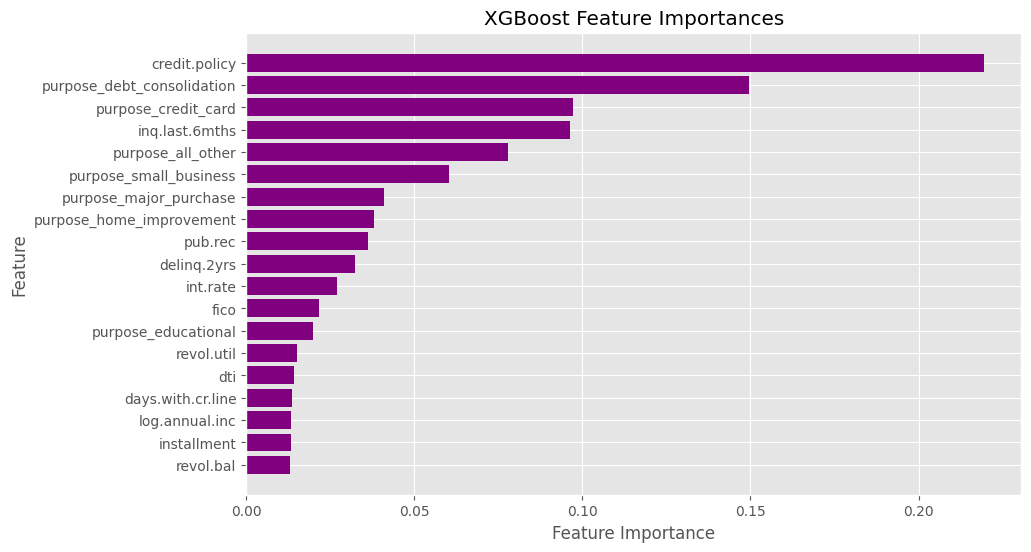

In [38]:
xgb_feature_importances = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': xgb_feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='purple')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.show()